In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import the Boston House Predication dataset
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
# Dataframe initialization
df = pd.DataFrame(dataset.data)

In [4]:
# Total number of rows and coloumns
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
# I targeted Crime rate by town
df['CRIM'] = dataset.target

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,CRIM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#Correlation matrix
corr = df.corr()
corr.shape

(14, 14)

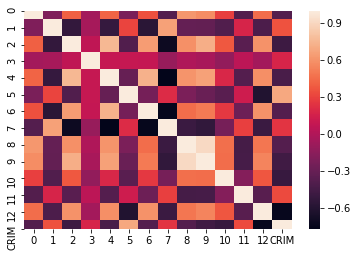

In [8]:
#Generate correlation heat-map
sns.heatmap(corr)

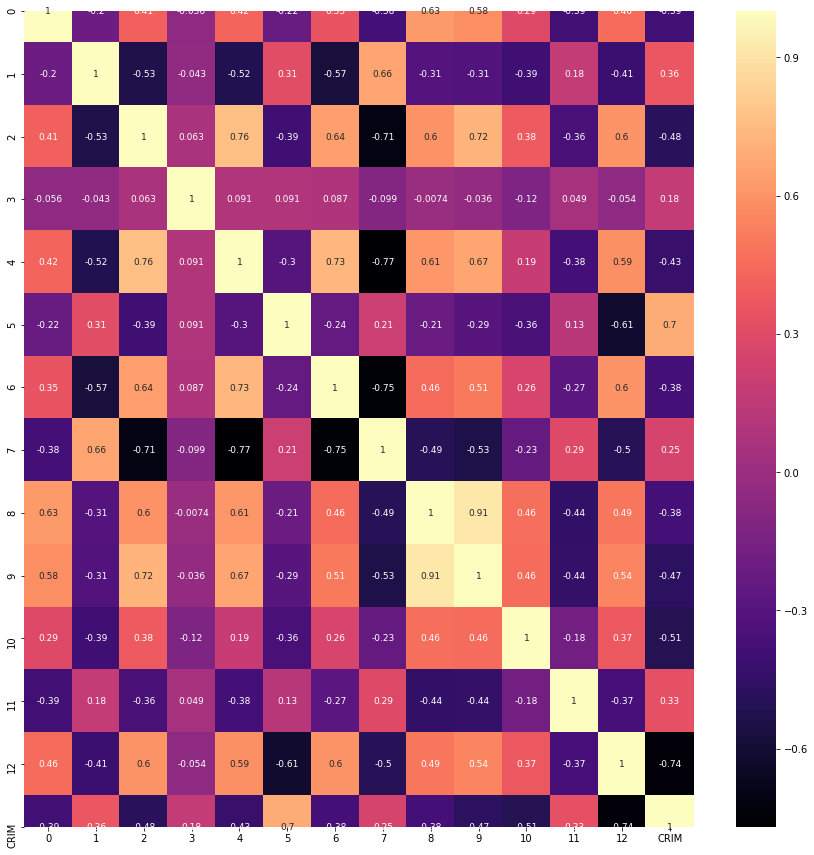

In [9]:
# correlation between features heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, annot_kws={'size':9}, cmap='magma')

In [10]:
# Split the data
X = df.drop(['CRIM'], axis = 1)
y = df['CRIM']

In [11]:
# Training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 6)

In [12]:
# Import Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [13]:
# Training the Random forest with the dataset 
rfr.fit(X_train, y_train)

C:\Users\bhagya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [14]:
#Training data model prediction
y_pred = rfr.predict(X_train)

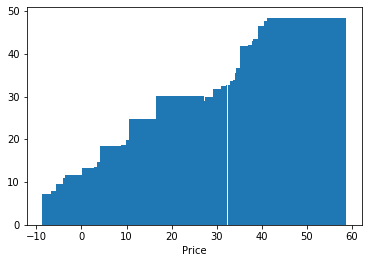

In [15]:
# Price rate Visualization
plt.bar(y_train, y_pred)
plt.xlabel("Price")
plt.show()

In [16]:
y_test_pred = rfr.predict(X_test)

In [17]:
#Price Prediction
price_rfr = metrics.r2_score(y_test, y_test_pred)
print('mse:',metrics.mean_squared_error(y_test, y_test_pred))
print('mae:',metrics.mean_absolute_error(y_test, y_test_pred))

mse: 21.637869169960474
mae: 2.7918181818181815


In [18]:
#Import linear Regression model
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression()

In [20]:
#Training the dataset by using Linear Regression
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Training data prediction
y_pred = lin_reg.predict(X_train)

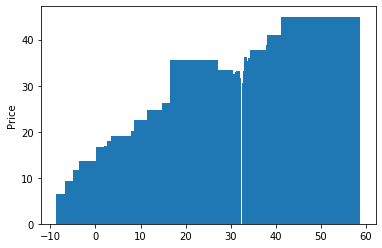

In [22]:
#Price rate Visualization
plt.bar(y_train, y_pred)
plt.ylabel("Price")
plt.show()

In [23]:
y_test_pred = lin_reg.predict(X_test)

In [24]:
#Accuracy Prediction
price_lin = metrics.r2_score(y_test, y_test_pred)
print('mae:',metrics.mean_absolute_error(y_test, y_test_pred))
print('mse:',metrics.mean_squared_error(y_test, y_test_pred))

mae: 3.740180076383689
mse: 29.96331164300765


In [25]:
# This step is to improve the model to get better results
from sklearn.preprocessing import StandardScaler

In [26]:
sdc = StandardScaler()
X_train = sdc.fit_transform(X_train)
X_test = sdc.transform(X_test)

In [27]:
table = pd.DataFrame({
    'Algorithm': ['Random Forest', 'Linear Regression'],
    'Accuracy': [price_rfr, price_lin]})
table.sort_values(by='Accuracy', ascending=False)


,Algorithm,Accuracy
0,Random Forest,0.750717
1,Linear Regression,0.654802
